In [ ]:
#  Import Libraries
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [5]:
#  Load Preprocessed Data
DATA_PATH = "../data/processed/train_delays_preprocessed.csv"
df = pd.read_csv(DATA_PATH)

#  Split Features & Target
X = df.drop(columns=["Delay (min)"])  # Features
y = df["Delay (min)"]  # Target

In [6]:
#  Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#  Define Models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, random_state=42)
}


In [7]:
#  Train & Evaluate Models
results = []

for name, model in models.items():
    print(f"🚆 Training {name}...")
    
    # Pipeline (Scaling + Model)
    pipeline = Pipeline([
        ("scaler", StandardScaler()),
        ("model", model)
    ])
    
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    # Evaluate Model
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    results.append({"Model": name, "MAE": mae, "RMSE": rmse, "R²": r2})

    print(f"📊 {name} Performance:")
    print(f"➡️ MAE: {mae:.2f} min")
    print(f"➡️ RMSE: {rmse:.2f} min")
    print(f"➡️ R² Score: {r2:.2f}\n")



🚆 Training Linear Regression...
📊 Linear Regression Performance:
➡️ MAE: 12.43 min
➡️ RMSE: 15.63 min
➡️ R² Score: 0.56

🚆 Training Random Forest...
📊 Random Forest Performance:
➡️ MAE: 12.36 min
➡️ RMSE: 15.69 min
➡️ R² Score: 0.56

🚆 Training XGBoost...
📊 XGBoost Performance:
➡️ MAE: 7.46 min
➡️ RMSE: 9.45 min
➡️ R² Score: 0.84



/var/folders/cr/zw_bcxpn257g4khbkhrtn_vm0000gn/T/ipykernel_47106/1927062238.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="MAE", data=df_results, palette="Blues")
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


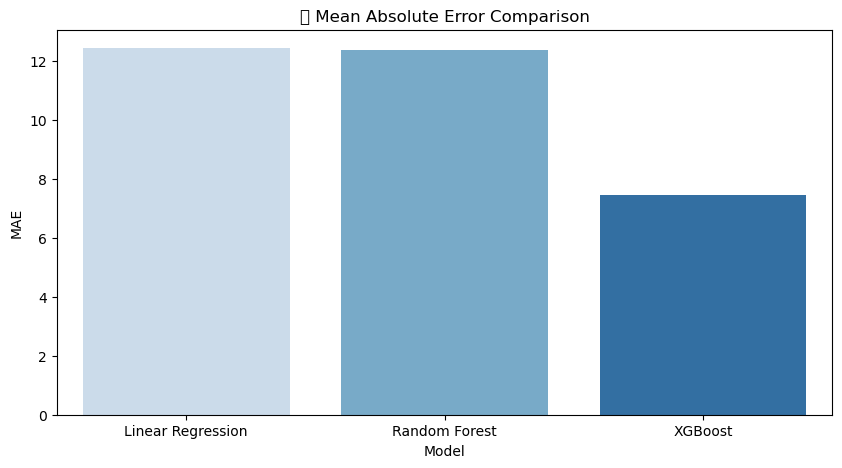

In [8]:
#  Convert Results to DataFrame
df_results = pd.DataFrame(results)

#  Plot Model Performance
plt.figure(figsize=(10,5))
sns.barplot(x="Model", y="MAE", data=df_results, palette="Blues")
plt.title("📊 Mean Absolute Error Comparison")
plt.show()


/var/folders/cr/zw_bcxpn257g4khbkhrtn_vm0000gn/T/ipykernel_47106/1716988721.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="RMSE", data=df_results, palette="Greens")
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


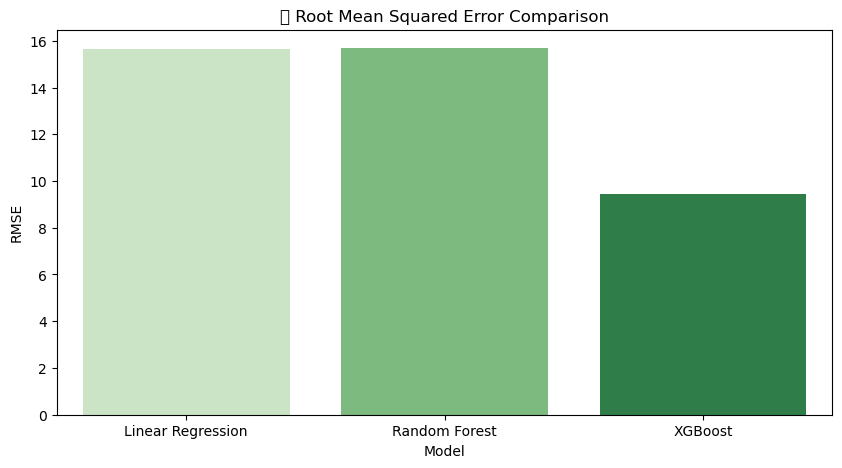

In [9]:
plt.figure(figsize=(10,5))
sns.barplot(x="Model", y="RMSE", data=df_results, palette="Greens")
plt.title("📊 Root Mean Squared Error Comparison")
plt.show()

/var/folders/cr/zw_bcxpn257g4khbkhrtn_vm0000gn/T/ipykernel_47106/1553040573.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="R²", data=df_results, palette="Reds")
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


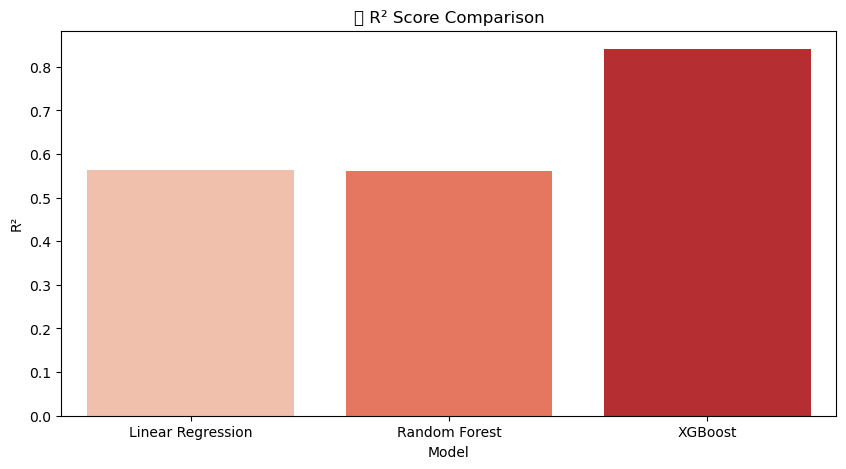

In [10]:
plt.figure(figsize=(10,5))
sns.barplot(x="Model", y="R²", data=df_results, palette="Reds")
plt.title("📊 R² Score Comparison")
plt.show()

In [11]:
#  Save Best Model
best_model_name = df_results.sort_values("RMSE").iloc[0]["Model"]
best_model = models[best_model_name]
pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("model", best_model)
])
pipeline.fit(X_train, y_train)


Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=None, device=None,
                              early_stopping_rounds=None,
                              enable_categorical=False, eval_metric=None,
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=100, n_jobs=None,
                              num_parallel_tree=None, random_state=42, ...))])

✅ Best Model 'XGBoost' saved at ../model/best_model_XGBoost.pkl


/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


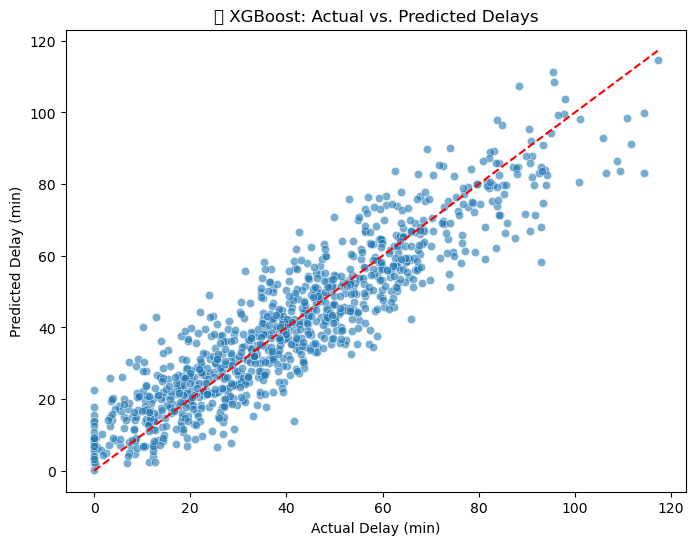

In [12]:

MODEL_PATH = f"../model/best_model_{best_model_name.replace(' ', '_')}.pkl"
joblib.dump(pipeline, MODEL_PATH)
print(f"✅ Best Model '{best_model_name}' saved at {MODEL_PATH}")

#  Visualizing Predictions vs Actual Values
y_pred_best = pipeline.predict(X_test)

plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred_best, alpha=0.6)
plt.plot([0, max(y_test)], [0, max(y_test)], color='red', linestyle='dashed')
plt.title(f"📊 {best_model_name}: Actual vs. Predicted Delays")
plt.xlabel("Actual Delay (min)")
plt.ylabel("Predicted Delay (min)")
plt.show()
